# Assignment 3: Exploring K-means

Let us suppose we have a set *S* of data points in the plane. We wish to group the points into compact clusters, such that the points in each cluster are close to one another but farther from the points in the other clusters. One common formulation of the clustering problem is as follows: Given set *S* of points and an integer *k*, determine a set of *k* cluster centers in the plane such that the sum of
the squared Euclidean distance of each point from its nearest cluster center is minimized. The resulting set of clusters is called a *partition* of S. These ideas generalize to any dimension but we shall work in the plane.

*K-means* is a common and efficient heuristic for clustering. K-means iteratively computes a set of *k* points (called *centers*) that implicitly represents
a partition. Given any set *Z* of centers, each center *z* in *Z* has a neighborhood defined as the set of data points that are
closer to *z* than to any other center in *Z.* K-means starts with a set *Z* of centers and computes their neighborhoods. In successive iterations, every center is moved to the centroid of its neighborhood and then the neighborhoods are recomputed based on the updated positions of the *k* centers. When neighborhoods are recomputed, data points will shift from one neighborhood to a different neighborhood if they are closer to the latter neighborhood's center. This process of moving centers and recomputing neighborhoods continues iteratively until some convergence criterion is satisfied, typically when two successive iterations produce
no changes to any of the *k* neighborhoods. The collection of neighborhoods that results is taken to be the partition of the data points produced by k-means applied to the initial set of centers. The [wikipedia article](http://en.wikipedia.org/wiki/K-means_clustering) is helpful for learning more.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

# datadir = 'data/'
# imagesdir = 'images/'

datadir = '/content/drive/My Drive/Notebooks/Assignment3/'

imagesdir = '/content/drive/My Drive/Notebooks/Assignment3/images/'

from IPython.display import Image, display

def display_images(images, dir=imagesdir):
    for image in images:
        display(Image(dir + image))

Mounted at /content/drive


In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib.cm as cm
import matplotlib.colors as colors

We will run k-means on data files obtained from [TSPLIB](http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/). You can pull files from this site but I'll provide you with some. Here is what the file att48.tsp looks like:

NAME : att48  
COMMENT : 48 capitals of the US (Padberg/Rinaldi)  
TYPE : TSP  
DIMENSION : 48  
EDGE_WEIGHT_TYPE : ATT    
NODE_COORD_SECTION  
1 6734 1453  
2 2233 10  
3 5530 1424  
4 401 841  
5 3082 1644  
...  *<more lines for further points>*   
45 10 2676  
46 6807 2993  
47 5185 3258  
48 3023 1942  
EOF


### Exercise 1

The list of points appears after the keyword NODE_COORD_SECTION. Your first task is to write a function that inputs the name of a TSP file and returns a numpy array, of shape (nbrPoints, 2), of its points.

In [84]:
def loadFromTSP(filename):
  file = datadir + filename
  f = open(file)
  tsp= f.read()
  df = pd.DataFrame([x.split(' ') for x in tsp.split('\n')])
  cols = list(df.columns)
  newcols = cols[1:] 
  df = df[newcols]
  df=df.drop(df.index[-2:])
  data=df.to_numpy()
  return data

In [85]:
data = loadFromTSP('att48.tsp')
data = data.astype('float32')
print('Nbr of data points: {}'.format(len(data)))
print('First five data points:\n {}'.format(data[:5]))

Nbr of data points: 48
First five data points:
 [[6734. 1453.]
 [2233.   10.]
 [5530. 1424.]
 [ 401.  841.]
 [3082. 1644.]]


For example:

```python
data = loadFromTSP('data/att48.tsp')  
print('Nbr of data points: {}'.format(len(data)))
print('First five data points:\n {}'.format(data[:5]))
```

```
Nbr of data points: 48
First five data points:
 [[ 6734.  1453.]
 [ 2233.    10.]
 [ 5530.  1424.]
 [  401.   841.]
 [ 3082.  1644.]]
 ```

Python's scientific module, SciPy, includes a routine for running k-means. Specifically, it's a method in the clustering and vector quantization module, scipy.cluster.vq.

In [6]:
import scipy.cluster.vq as vq

K-means is called like this:  

```python
centroids, labels = vq.kmeans2(data, k, minit='points')
```
  
Here *data* is a two-dimensional numpy array with the shape (nbrPoints, 2), and *k* is the number of clusters we seek. The keyword argument *minit* specifies the initialization routine. By giving it the value 'points', we're saying that the initial set of *k* centers should be *k* points of *data*, chosen at random.

The function call returns a tuple ```(centroids, labels)```. Here, ```centroids``` is an array of *k* centroids (centers), one for each of the *k* clusters. ```labels``` is an integer array of length *nbrPoints* which indicates the cluster to which each of the data points belongs: Data points ```i``` belongs to cluster ```labels[i]``` where the labels are integers in the range 0, 1,..., *k*-1.

Here's a simple example of its use.


In [7]:
aa = np.array([0,0,0,1,1,0,1,1], dtype=np.float32).reshape(4,2)
ab = np.concatenate((aa, aa+10))
ab

array([[ 0.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  1.],
       [10., 10.],
       [10., 11.],
       [11., 10.],
       [11., 11.]], dtype=float32)

In [8]:
centroids, labels = vq.kmeans2(ab, 8, minit='points')
centroids, labels

(array([[10., 11.],
        [10., 10.],
        [11., 10.],
        [11., 11.],
        [ 0.,  1.],
        [ 0.,  0.],
        [ 1.,  1.],
        [ 1.,  0.]], dtype=float32),
 array([5, 4, 7, 6, 1, 0, 2, 3], dtype=int32))

The output tuple (centroids,labels) are interpreted together. Here it says that the first four points of the array belong to cluster 0 whose centroid is (0.5, 0.5), and the last four points belong to cluster 1 whose centroid is (10.5, 10.5). This is of course optimal for this simple problem instance but optimality is not guaranteed by k-means in general; k-means is just a heuristic.

Here are the images that result from a run of k-means on att48.tsp, for the values k=3 (i.e., 3 clusters) and k=5.

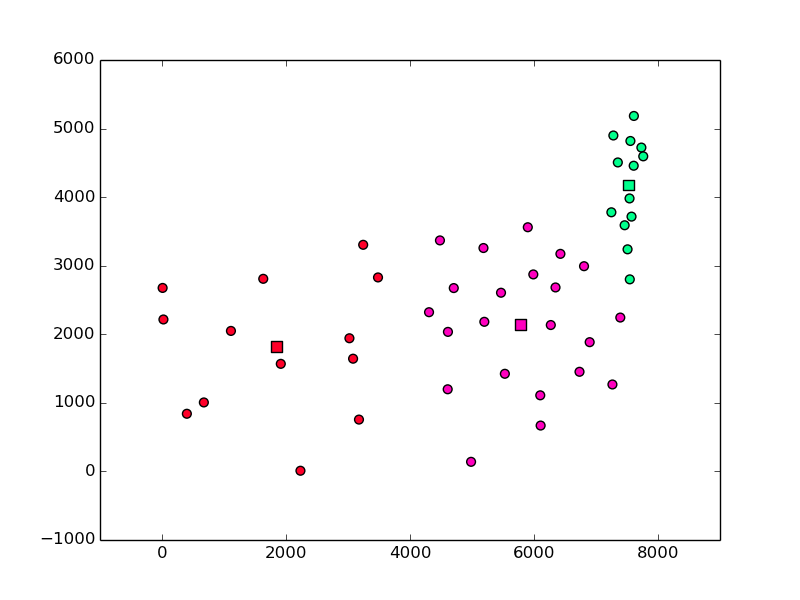

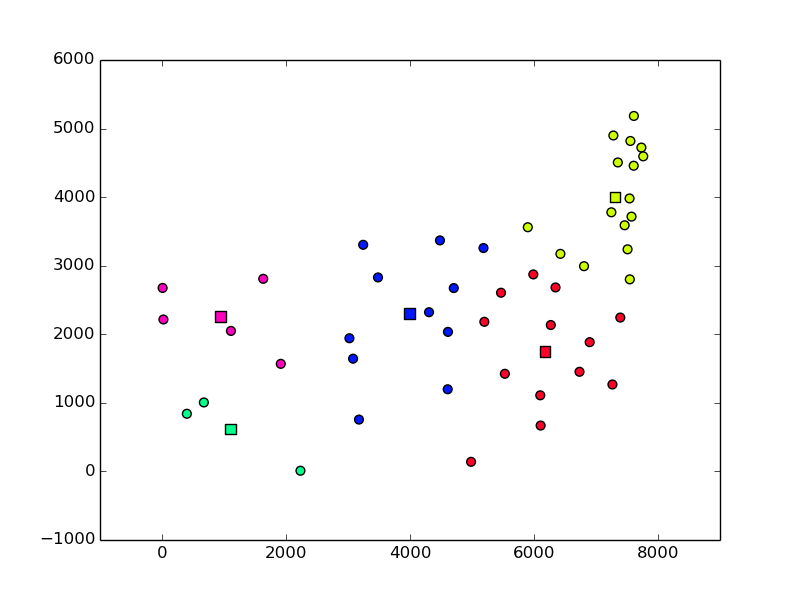

In [9]:
display_images(['att48k3.png', 'att48k5.png'])

### Exercise 2

Each data point, depicted as a disk, is assigned its own cluster, indicated by color. Also, each cluster's centroid is depicted as a square of the same color. The second part of this assignment is to write a function that takes a data set (i.e., a numpy array of points) and the (centroids,labels) tuple that results from running k-means on this data set, and produces scatterplots like those above above, where each cluster gets a distinct color, and each cluster's centroid is also depicted.

In [43]:
def scatterplotOfClusters(data, centroids, labels, cmap_name='gist_rainbow'):
    res_data= np.empty(np.shape(data))
    gist_rainbow= cm.get_cmap(cmap_name)
    colors= gist_rainbow(np.linspace(0,1,np.shape(centroids)[0]))
    res_colors= np.empty((np.shape(res_data)[0],np.shape(colors)[1]))
    k=0
    for i in range(0,np.shape(centroids)[0]):
      for j in range(0,len(labels)):
        if(labels[j]==i):
          res_data[k,:]= data[j,:]
          res_colors[k,:]=colors[i,:]
          k=k+1
    plt.scatter(res_data[:,0],res_data[:,1],c=res_colors, edgecolors='black')
    plt.scatter(centroids[:,0],centroids[:,1],c=colors,marker="s", edgecolors='black')

For example:

```python
data = loadFromTSP('data/att48.tsp')  
centroids, labels = vq.kmeans2(data, 8, minit='points')
scatterplotOfClusters(data, centroids, labels)
```


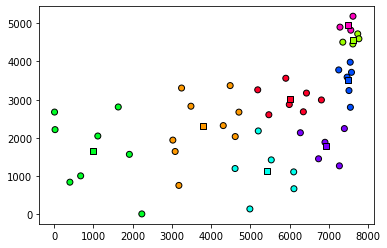

In [44]:
centroids, labels = vq.kmeans2(data, 8, minit='points')
scatterplotOfClusters(data, centroids, labels)

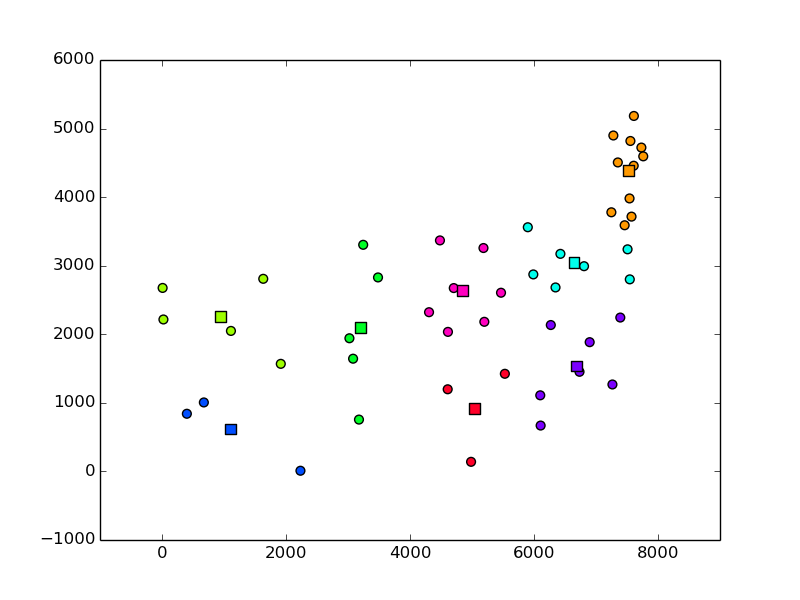

In [12]:
display_images(['att48k8.png'])

The larger the value of *k*, the more clusters there are in the partition, and the tighter these clusters are. In effect, with more clusters, the centroids are better representatives of the dataset as a whole. There are a number of ways of capturing the quality of a partition. Here is one way. We define the *average within-cluster sum of squared distances*, to be the average of the sum of squared distances between the cluster's points and its centroid. Let's refer to this as *WCSS(C)* for cluster C. Then, we'll take the partition quality to be the average over the *WCSS(C)* as *C* ranges over the partition's clusters *C*.

We can use the following function to compute the quality of a partition for the dataset *data*, where the partition is represented by the arguments *centroids* and *labels*.

In [83]:
def avgWithinSS(data, centroids, labels):
    k = len(centroids)
    res = 0.0
    for c in range(k):
        flags = labels == c
        pointsInC = data[flags]
        def d2(p):
            delta = p - centroids[c]
            return sum(delta*delta)
        dists = np.apply_along_axis(d2, axis=1, arr=pointsInC)
        res += sum(dists) / len(pointsInC)
    return res / k

When we run *avgWithinSS*, we obtain a partition quality value for *k*=len(centroids). Let's call this value *PQ(k)*. We can use the following function to generate an array of *PQ(k)* values as *k* ranges from 1 through *kmax*, where we choose *kmax* to be some integer no greater than the number of data points.

In [82]:
def avgWithinSSOverK(data, kmax):
    def f(k):
        return vq.kmeans2(data, k, minit='points', missing="raise")
    return [avgWithinSS(data, *f(k)) for k in range(1, kmax+1)]

Here we plot the partition quality values as *k* ranges from 1 through 24 for att48.tsp. Notice that the quality generally improves as *k* increases, but not always. Note k-means is run once for each value of *k*. Remember, for each value of *k*, k-means runs from a random set of *k* points. Sometimes it will converge to an excellent solution, and other times not so great a solution. On average, partition quality improves with greater *k*, but for particular runs of k-means this may not always be so.


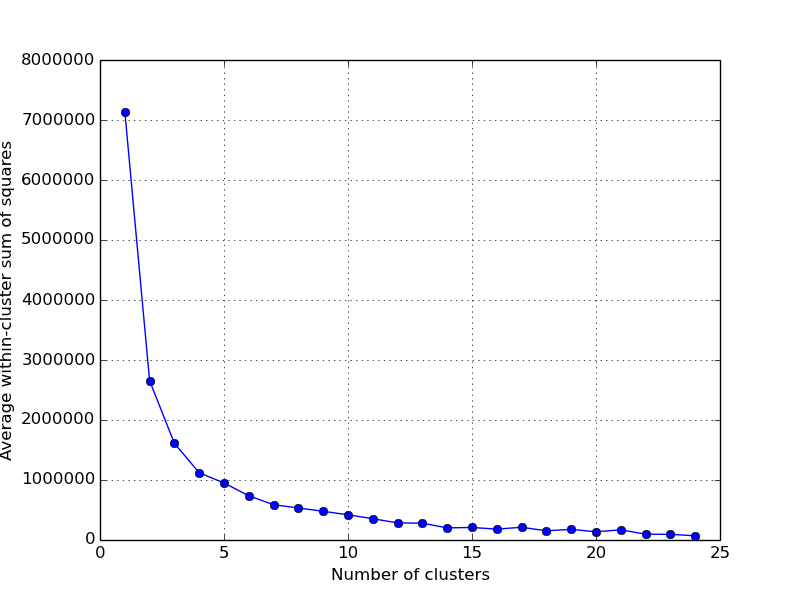

In [15]:
display_images(['attAVS1.png'])

### Exercise 3

The next part of this assignment is to write code to produce the sort of graph we have above. The graph above was produced by calling *plotWithinSS(avgWithinSSOverK(data, 24))* where *data* is the numpy array of data points from att48.tsp.

In [80]:
def plotWithinSS(avgWithinSS, num):
    y= avgWithinSSOverK(data, num)
    x = list(range(1, num+1))
    plt.plot(x,y,marker='o')
    plt.xlabel('Number of Clusters')
    plt.grid()
    plt.ylabel('Average within-cluster sum of squares')
    plt.ticklabel_format(style='plain')
    plt.ylim([0, 8000000])

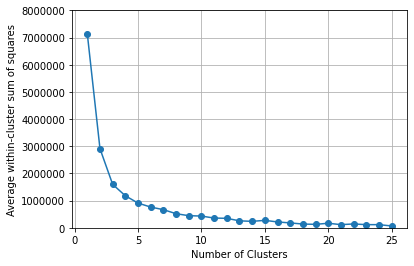

In [81]:
plotWithinSS(avgWithinSS, 25)

Here is the last part of this assignment. We recognize that the solutions produced by k-means are sensitive to the initial set of centers. Each time we run *vq.kmeans2(data, k, minit='points')* for the same *data* and value of *k*, we may obtain different results. This is because the *k* points used for the initial centers are chosen randomly. Here is the histogram of 2000 runs of k-means on *att48.tsp*, for *k*=8. The x-axis shows the *avgWithinSS*. Each bar corresponds to a bin indicating the number of runs whose *avgWithinSS* falls within the bin.

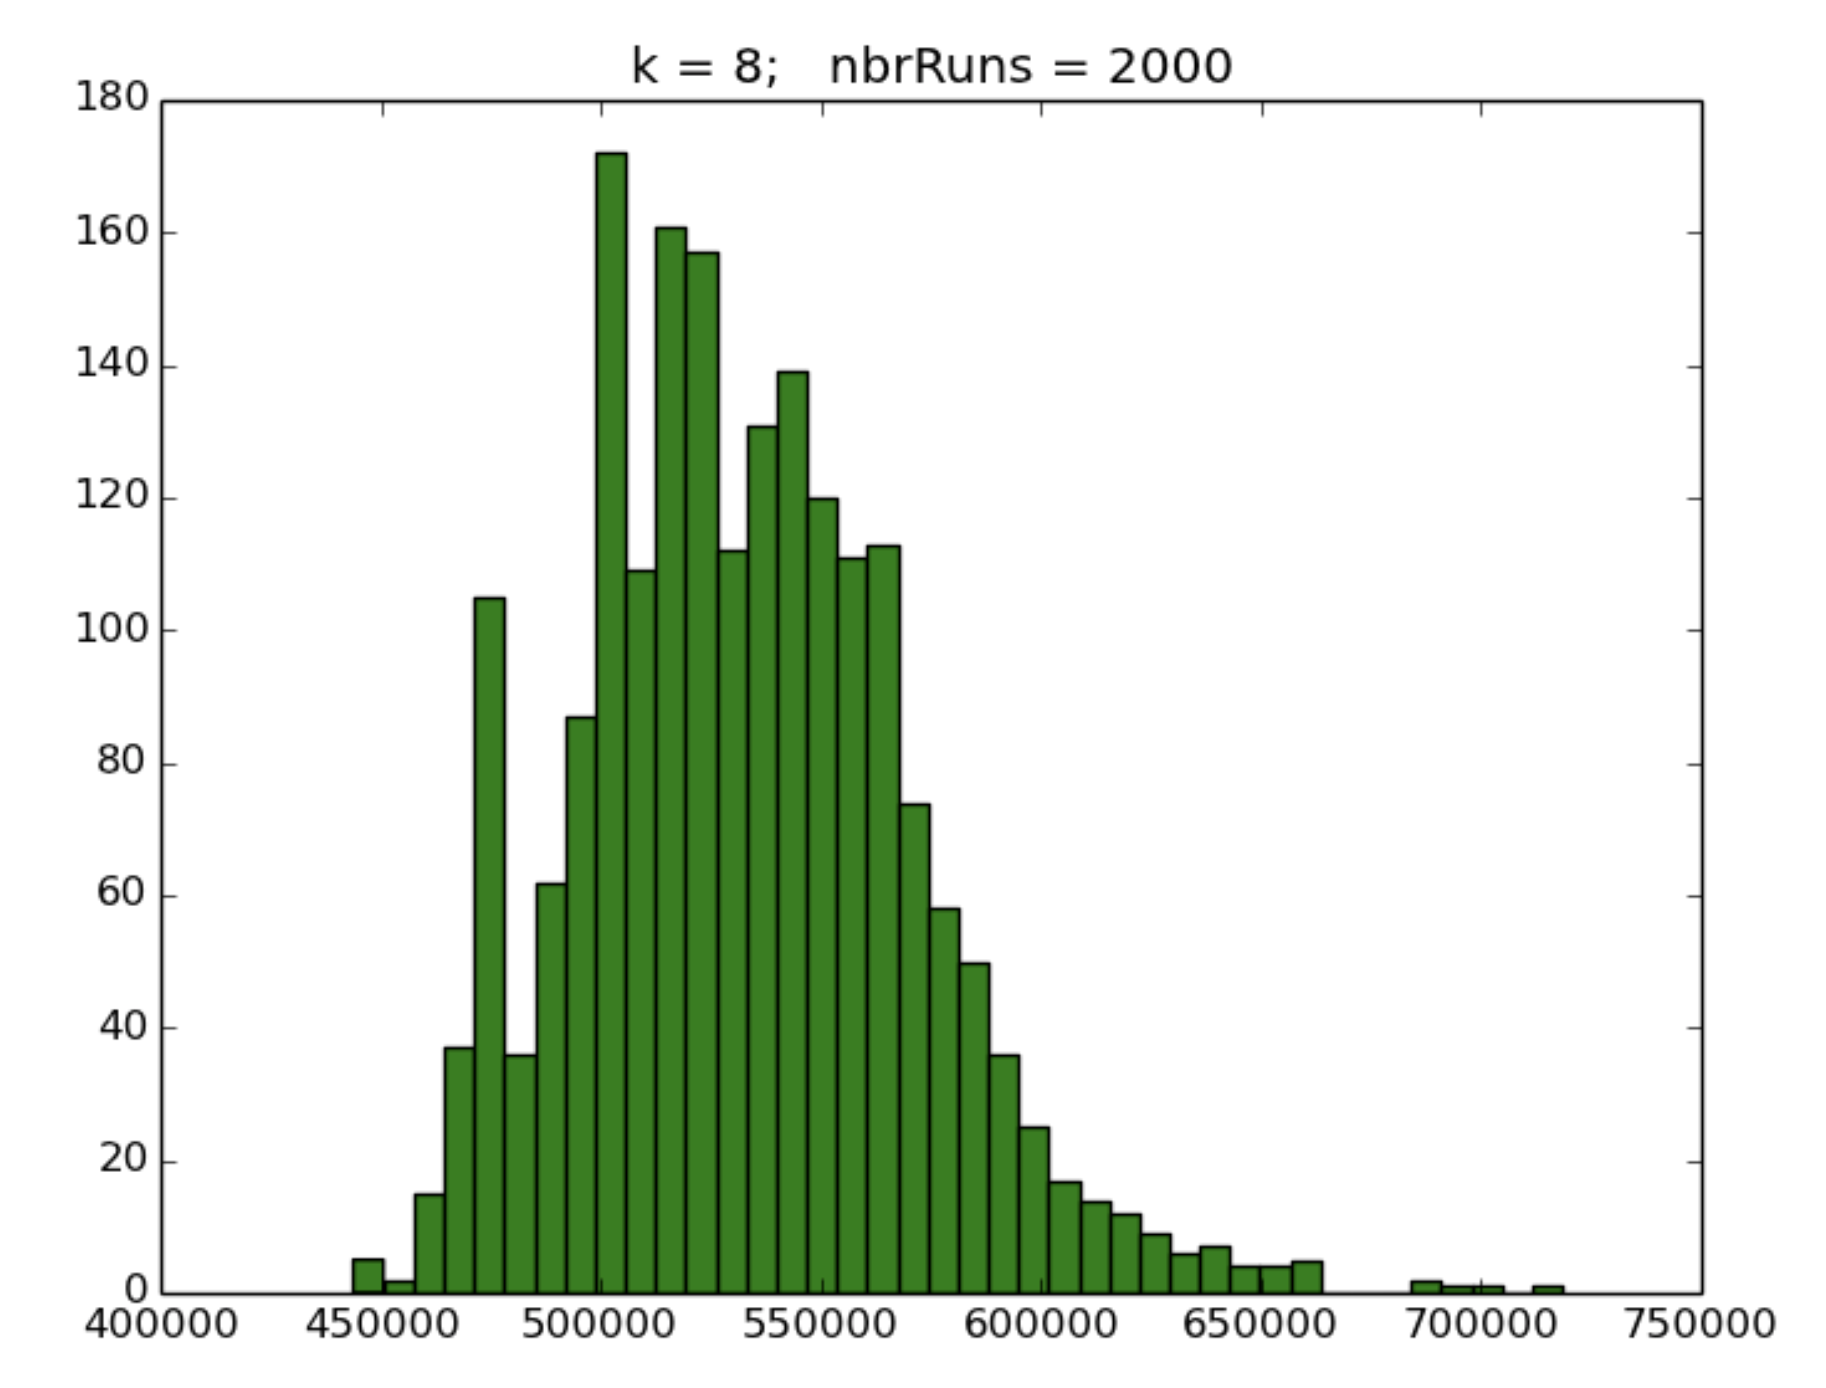

In [18]:
display_images(['hist.att48B.png'])

### Exercise 4

The histogram above was generated with this call:  *plotMultipleRuns(data, 8, 40, 2000, facecolor='green')*.  For this part of the assignment, write this function.

In [68]:
def avgWithinSSOverK2(data, k):
    def f(k):
        return vq.kmeans2(data, k, minit='points', missing="raise")
    return avgWithinSS(data, *f(k))

In [66]:
def plotMultipleRuns(data, k, bins, nbrRuns, **kwargs):
  total= list()
  for i in range(nbrRuns):
    try:
      total.append(avgWithinSSOverK2(data,k))
    except:
      continue
  plt.hist(total,bins=bins, edgecolor='black', **kwargs)
  plt.title('k=8, nbrRuns = 2000')

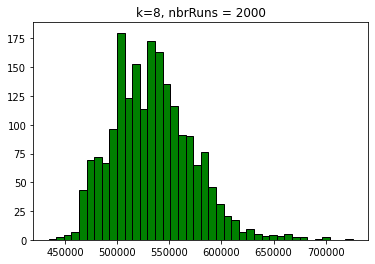

In [67]:
plotMultipleRuns(data, 8, 40,2000, facecolor='green')

It's worth mentioning that when we run k-means with input *k*, we sometimes obtain a partition with strictly fewer than *k* clusters. In generating the partitions in plotMultipleRuns, you might want to omit such clusters. Look into the use of the *missing* parameter of the *vq.kmeans2* function.

### For submission

Please submit an IPython notebook containing your code solutions. You may modify this notebook or write your own notebook from scratch. As a reminder, there are four functions to be defined for this assignment:  

* ```loadFromTSP(filename)```
* ```scatterplotOfClusters(data, centroids, labels)```
* ```plotWithinSS(avgWithinSS, **kwargs)```
* ```plotMultipleRuns(data, k, bins=20, nbrRuns=200, **kwargs)```

Of course you're welcome to also define helper functions that assist in the definition of the above four functions.

Also, after the due date, you're welcome to post your notebook to the *Assignment 3* forum of our discussion board. **It is most important that you wait until after the due date to post your assignment for your classmates to read.**
